In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,ID,TOOL_ID,210X1,210X2,210X3,210X4,210X5,210X6,210X7,210X8,...,750X1444,750X1445,750X1446,750X1447,750X1448,750X1449,750X1450,750X1451,750X1452,Y
0,ID001,N,102.05,0.465,0.27,1.430,67.45,4.620,-0.54,-1.05,...,0.00072,0.00072,25.7,0.00072,0.00072,25.7,0.00072,0.00072,2.400000e+12,2.945079
1,ID002,M,100.95,0.805,0.22,3.477,62.08,3.412,-2.12,1.02,...,0.00072,0.00072,25.5,0.00072,0.00072,25.5,0.00072,0.00072,2.400000e+12,2.955092
2,ID003,L,98.56,0.555,0.24,1.172,56.70,3.080,-2.25,0.88,...,0.00064,0.00064,25.2,0.00064,0.00064,25.2,0.00064,0.00064,2.400000e+12,2.741264
3,ID004,M,100.35,0.901,0.22,3.631,62.25,3.949,-1.98,0.82,...,0.00072,0.00072,26.4,0.00072,0.00072,26.4,0.00072,0.00072,2.400000e+12,2.799336
4,ID005,M,100.25,0.854,0.23,3.429,61.42,3.630,-1.89,1.02,...,0.00072,0.00072,26.4,0.00072,0.00072,26.4,0.00072,0.00072,2.400000e+12,2.692093


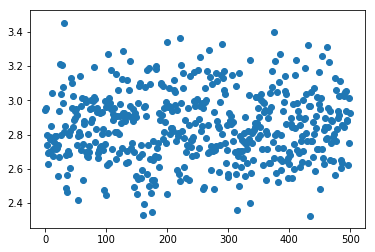

In [4]:
plt.scatter(train_df.index,train_df['Y'])

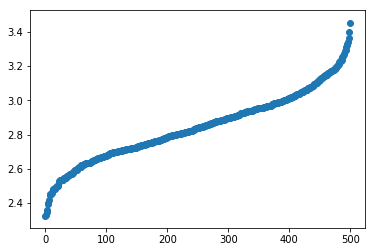

In [6]:
plt.scatter(range(len(train_df)),train_df['Y'].sort_values())

In [22]:
#筛选变量
#1、随机森林
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
#1.1、string变量转换为float
for c,dtype in zip(train_df.columns,train_df.dtypes):
    if dtype != 'float64' and dtype !='int64' and c !='ID':
        train_df[c] = LabelEncoder().fit_transform(train_df[c])
#1.2、缺失值做零填充
for c in train_df.columns:
    train_df[c] = train_df[c].fillna(0)
rf = RandomForestRegressor()
rf.fit(train_df.drop(['ID','Y'],axis=1),train_df['Y'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
#1.3、输出随机森林变量重要性

In [35]:
fi_df = pd.DataFrame([train_df.columns.drop(['ID','Y']),rf.feature_importances_]).T

In [37]:
fi_df.columns=['feature','importance']

In [41]:
fi_df.sort_values(by='importance',ascending=False,inplace=True)

In [62]:
#挑选前30个变量出来，然后观察其相关性，做出热力图
feature_pick = fi_df['feature'].head(30).tolist()

In [63]:
train_df[feature_pick].corr()

,310X153,340X124,310X132,310X33,330X1150,420X4,330X1148,312X783,310X13,210X188,...,440AX182,220X568,330X1166,312X691,310X31,220X348,440AX14,312X72,520X267,340X27
310X153,1.000000,0.010000,0.740242,-0.781668,0.252646,0.076905,0.254210,-0.012867,0.098954,0.175272,...,0.076520,0.209070,0.138983,-0.072284,0.419056,-0.198546,0.034149,-0.065695,-0.115741,0.027242
340X124,0.010000,1.000000,0.054038,-0.061264,-0.059046,0.099293,-0.059797,0.060555,-0.000861,-0.027617,...,0.031879,-0.115956,-0.085976,0.096351,-0.006233,0.103985,-0.054986,0.058563,0.012566,-0.041300
310X132,0.740242,0.054038,1.000000,-0.691738,0.266040,0.079519,0.268252,0.000275,0.073682,0.128527,...,0.060618,0.060651,0.138406,-0.111604,0.581300,-0.069452,0.040500,-0.064687,-0.054566,-0.004539
310X33,-0.781668,-0.061264,-0.691738,1.000000,-0.058990,-0.100710,-0.058946,-0.004519,-0.140181,-0.085381,...,-0.084481,-0.191917,-0.146729,0.009706,-0.254653,0.205361,0.016159,0.025045,0.071860,-0.045710
330X1150,0.252646,-0.059046,0.266040,-0.058990,1.000000,-0.028835,0.999320,-0.002821,-0.024086,0.184528,...,0.006637,-0.137594,0.119808,-0.148316,0.487715,0.103287,0.041530,-0.050909,-0.033998,-0.000619
420X4,0.076905,0.099293,0.079519,-0.100710,-0.028835,1.000000,-0.029481,0.009063,-0.019816,0.080027,...,0.020021,0.144457,0.010546,-0.030872,-0.016015,-0.124948,0.022287,-0.055544,-0.044737,-0.020095
330X1148,0.254210,-0.059797,0.268252,-0.058946,0.999320,-0.029481,1.000000,-0.003388,-0.027450,0.184172,...,0.005522,-0.135883,0.117182,-0.149435,0.493260,0.102951,0.040906,-0.050524,-0.032859,-0.002335
312X783,-0.012867,0.060555,0.000275,-0.004519,-0.002821,0.009063,-0.003388,1.000000,0.003224,-0.109226,...,-0.130788,-0.018001,-0.114769,0.189427,-0.042590,0.070629,0.045862,0.144576,-0.064291,-0.006410
310X13,0.098954,-0.000861,0.073682,-0.140181,-0.024086,-0.019816,-0.027450,0.003224,1.000000,-0.018995,...,-0.054383,-0.063255,0.062387,-0.022609,-0.174791,0.064809,0.064431,-0.143584,0.117936,0.049412
210X188,0.175272,-0.027617,0.128527,-0.085381,0.184528,0.080027,0.184172,-0.109226,-0.018995,1.000000,...,0.005494,0.091798,0.030466,-0.102767,0.157533,-0.138575,0.025179,0.010312,0.016635,-0.054906


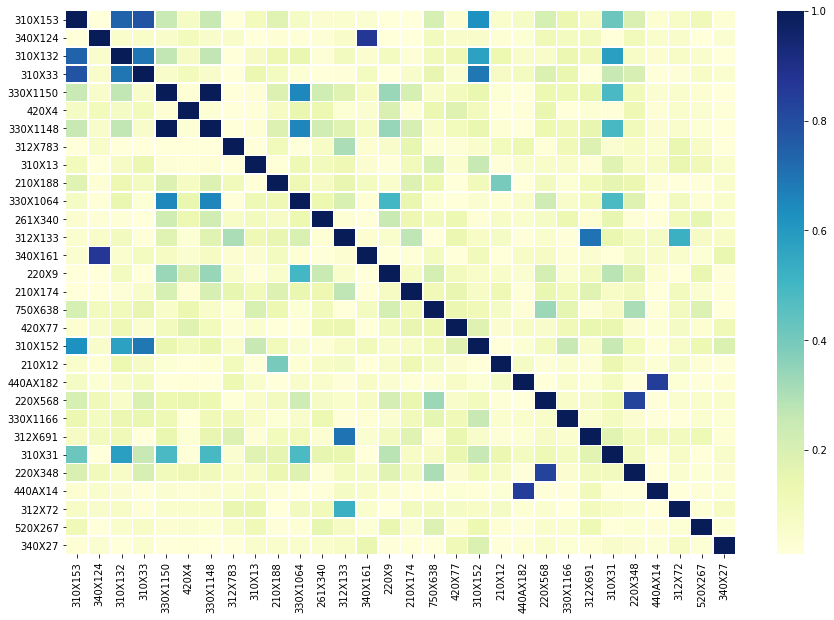

In [64]:
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(np.abs(train_df[feature_pick].corr()),cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

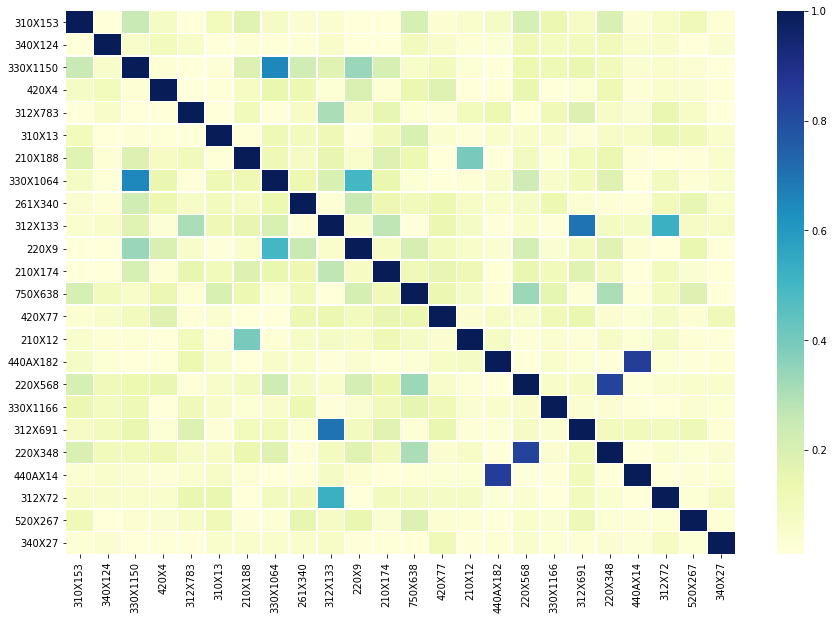

In [70]:
#删除强相关的一些变量
feature_pick.remove('310X132')
feature_pick.remove('310X33')
feature_pick.remove('310X152')
feature_pick.remove('310X31')
feature_pick.remove('340X161')
feature_pick.remove('330X1148')
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(np.abs(train_df[feature_pick].corr()),cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

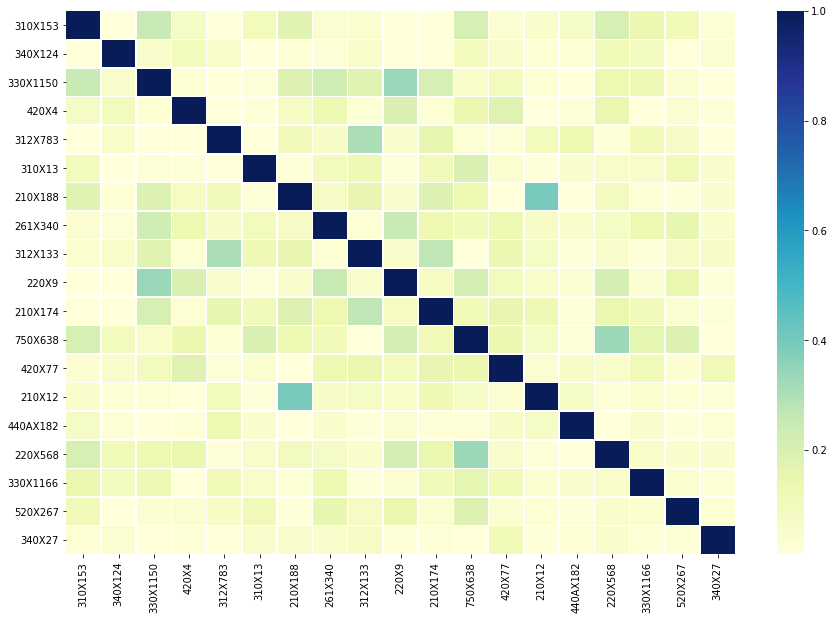

In [73]:
#删除强相关的一些变量
#feature_pick.remove('330X1064')
#feature_pick.remove('312X691')
#feature_pick.remove('312X72')
feature_pick.remove('220X348')
feature_pick.remove('440AX14')
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(np.abs(train_df[feature_pick].corr()),cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

In [74]:
train_df[feature_pick].corr()

,310X153,340X124,330X1150,420X4,312X783,310X13,210X188,261X340,312X133,220X9,210X174,750X638,420X77,210X12,440AX182,220X568,330X1166,520X267,340X27
310X153,1.000000,0.010000,0.252646,0.076905,-0.012867,0.098954,0.175272,0.040684,0.045267,0.004865,0.003995,-0.209583,-0.034363,0.052754,0.076520,0.209070,0.138983,-0.115741,0.027242
340X124,0.010000,1.000000,-0.059046,0.099293,0.060555,-0.000861,-0.027617,0.022305,-0.062515,-0.011191,-0.005241,0.097193,0.057742,-0.026567,0.031879,-0.115956,-0.085976,0.012566,-0.041300
330X1150,0.252646,-0.059046,1.000000,-0.028835,-0.002821,-0.024086,0.184528,-0.226615,0.173964,0.336806,-0.207249,-0.060878,-0.097076,-0.030026,0.006637,-0.137594,0.119808,-0.033998,-0.000619
420X4,0.076905,0.099293,-0.028835,1.000000,0.009063,-0.019816,0.080027,0.132258,0.032521,-0.196063,0.028912,-0.141132,0.181203,-0.011989,0.020021,0.144457,0.010546,-0.044737,-0.020095
312X783,-0.012867,0.060555,-0.002821,0.009063,1.000000,0.003224,-0.109226,0.065071,-0.307686,0.059786,0.156505,0.029798,0.024518,0.101667,-0.130788,-0.018001,-0.114769,-0.064291,-0.006410
310X13,0.098954,-0.000861,-0.024086,-0.019816,0.003224,1.000000,-0.018995,0.098006,0.123257,0.016798,-0.109431,0.202050,0.044874,-0.017397,-0.054383,-0.063255,0.062387,0.117936,0.049412
210X188,0.175272,-0.027617,0.184528,0.080027,-0.109226,-0.018995,1.000000,-0.072939,0.149718,0.052607,-0.186238,-0.131591,-0.007695,-0.396046,0.005494,0.091798,0.030466,0.016635,-0.054906
261X340,0.040684,0.022305,-0.226615,0.132258,0.065071,0.098006,-0.072939,1.000000,-0.027947,-0.247370,0.127510,0.108787,0.133268,0.069128,-0.054232,0.076343,-0.130366,-0.154330,0.052930
312X133,0.045267,-0.062515,0.173964,0.032521,-0.307686,0.123257,0.149718,-0.027947,1.000000,-0.052255,-0.272062,0.001813,-0.140514,-0.078847,0.015548,0.054156,0.014098,-0.075169,-0.068621
220X9,0.004865,-0.011191,0.336806,-0.196063,0.059786,0.016798,0.052607,-0.247370,-0.052255,1.000000,-0.081676,0.213682,0.095147,0.061936,0.041169,-0.218253,-0.043008,0.143559,-0.016441


In [75]:
#回归预测，先用简单的线性回归测测效果
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_df[feature_pick],train_df['Y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
testA = pd.read_csv('testA.csv')

In [78]:
for c,dtype in zip(testA.columns,testA.dtypes):
    if dtype != 'float64' and dtype !='int64' and c !='ID':
        testA[c] = LabelEncoder().fit_transform(testA[c])

for c in testA.columns:
    testA[c] = testA[c].fillna(0)

In [79]:
regr.predict(testA[feature_pick])

array([ 2.7295632 ,  2.78164277,  2.82399007,  2.79555637,  2.78657805,
        2.92639152,  2.89910886,  2.73596832,  2.74568714,  2.70640041,
        2.74396176,  3.02706872,  2.89708259,  2.92091386,  2.9400726 ,
        2.61298587,  2.65262697,  2.91764836,  2.61422551,  2.67762547,
        2.9537232 ,  2.64054844,  2.69463565,  2.77682242,  2.62012101,
        2.88138785,  2.64234546,  2.70863169,  2.87099311,  2.91537332,
        2.74656128,  2.772349  ,  2.85081124,  2.77992502,  2.93718343,
        2.84798853,  2.83952646,  2.69928955,  2.81142205,  2.80700023,
        2.64122452,  2.79449045,  2.70793909,  2.78851612,  2.85052805,
        2.8476071 ,  2.77331608,  2.76781971,  2.74779803,  2.76548753,
        2.92089997,  2.80067632,  2.81794399,  2.932094  ,  2.86362746,
        2.88936593,  2.8571125 ,  2.70880269,  2.83251082,  2.76639398,
        2.81932833,  2.69424196,  2.72793288,  2.88895555,  2.83645774,
        2.84070425,  2.78483463,  2.92324206,  2.92969598,  2.80

In [82]:
submission = pd.DataFrame({'ID':testA['ID'],'predict':regr.predict(testA[feature_pick])})

In [83]:
submission.to_csv('submission.csv',index=False,header=False)